In [14]:
import sys
import os
from dotenv import load_dotenv

# Füge das übergeordnete Verzeichnis zu sys.path hinzu
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.insert(0, parent_dir)

load_dotenv()

True

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy as dc
from scipy.interpolate import CubicSpline
from utilities import magnitude_warp, time_warp, window_slice, permutation, rotation, scaling, jitter

In [16]:
RED = os.getenv('RED', 'red')
BLUE = os.getenv('BLUE', 'blue')

In [17]:
BLUE

'#00BAE5'

In [18]:
def plot_data(ori, syn=[]):
    # Plotten der Zeitreihe
    plt.figure(figsize=(10, 5))

    if len(syn) != 0:
        plt.plot(np.arange(range), ori[:range], linestyle=':', linewidth=4, color=BLUE, label='Original')
        plt.plot(np.arange(range), syn[:range], linestyle='-', linewidth=4, color=RED, label='Synthetisch')
    else:
        plt.plot(np.arange(range), ori[:range], linestyle='-', linewidth=4, color=BLUE, label='Original')

    plt.xticks([])  
    plt.yticks([]) 

    plt.show()

In [19]:
range = 3*24

data_df = pd.read_csv("../../data/real/mitv_prep_1y.csv")
data_numpy = data_df.to_numpy()[:range]
traffic = data_numpy[:,0].reshape(1, -1, 1)

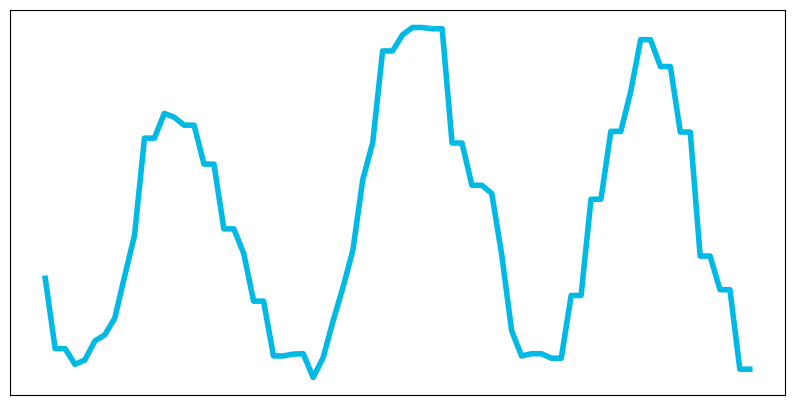

In [20]:
# Original
plot_data(traffic.reshape(-1))

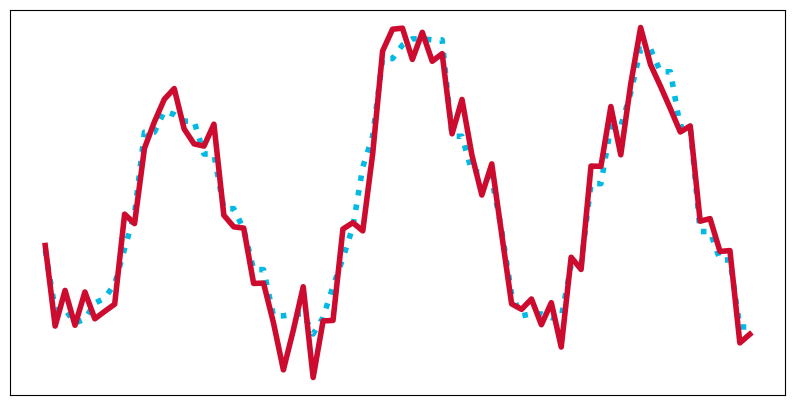

In [21]:
# Jittering
traffic_jitter = jitter(dc(traffic), 300).reshape(-1)
plot_data(traffic.reshape(-1), traffic_jitter)

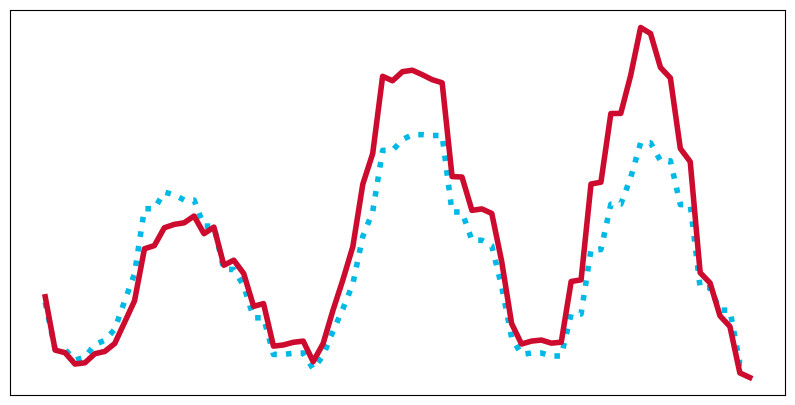

In [36]:
# Magnitude Warping
traffic_magnitude = magnitude_warp(dc(traffic)).reshape(-1)
plot_data(traffic.reshape(-1), traffic_magnitude)

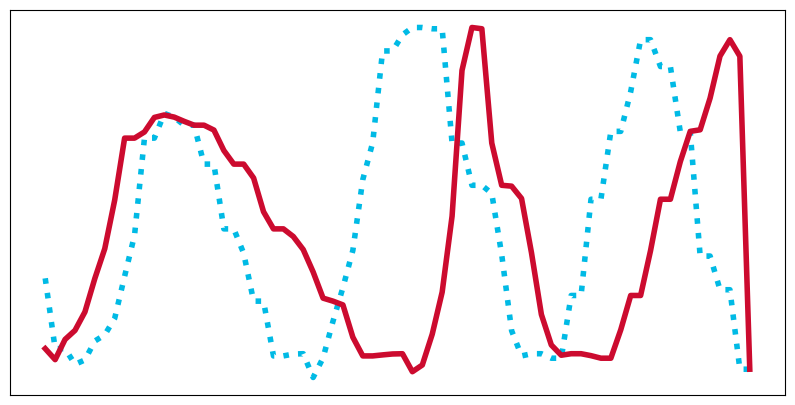

In [27]:
# Time Warping
traffic_time = time_warp(dc(traffic)).reshape(-1)
plot_data(traffic.reshape(-1), traffic_time)

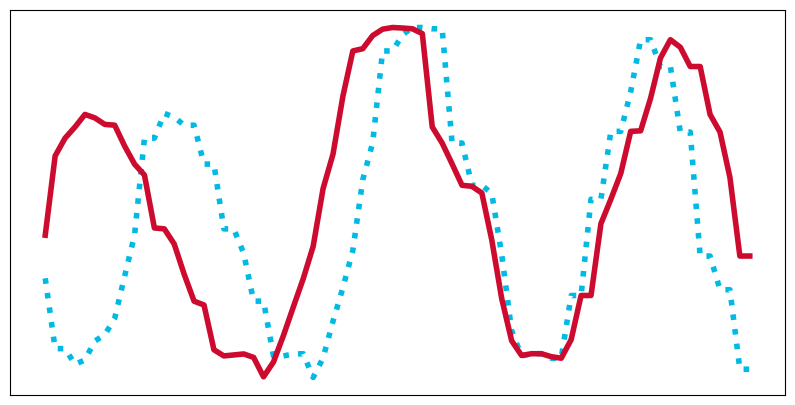

In [40]:
# Window Slicing
traffic_window = window_slice(dc(traffic), reduce_ratio=0.8).reshape(-1)
plot_data(traffic.reshape(-1), traffic_window)

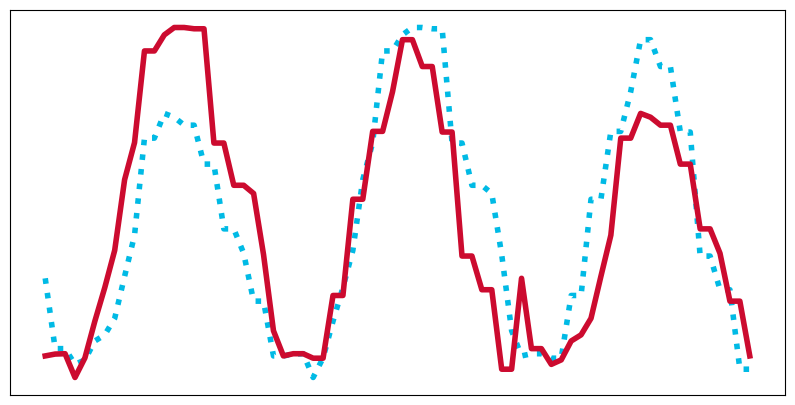

In [29]:
# Perumtatio
traffic_permutation = permutation(dc(traffic), max_segments=5, seg_mode="equal").reshape(-1)
plot_data(traffic.reshape(-1), traffic_permutation)

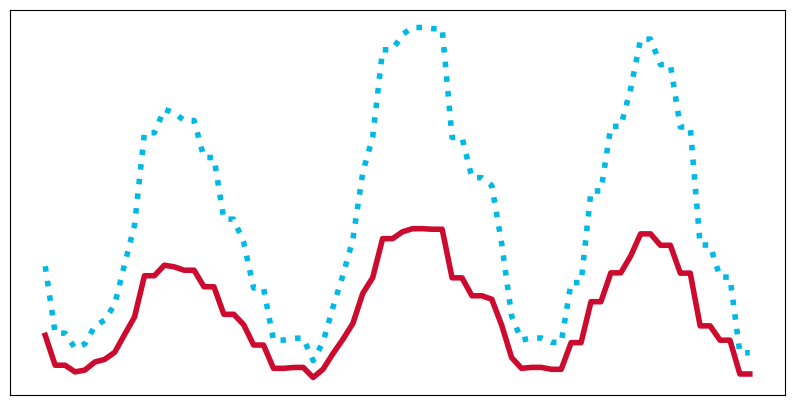

In [28]:
# Scaling
traffic_scaled = scaling(dc(traffic), sigma=0.5).reshape(-1)
plot_data(traffic.reshape(-1), traffic_scaled)
